# Visualizing the forecastings

In [1]:
import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

from sirds_model_visualization import get_sirds, get_sirds_extras, show_performance, plot_result, \
    show_performance_single, plot_result_single

## Reading data

In [2]:
df = pd.read_csv('../../municipal_epidemic_episodes_analysis/data/df_ts_epidemic_episodes.csv', index_col=0)
df.DATA = pd.to_datetime(df.DATA)

In [3]:
df.columns

Index(['DATA', 'CODIGO_MUNICIPIO_6', 'NOVOS_CASOS_SRAG', 'OBITOS_NOVOS',
       'OBITOS', 'OBITOS_NOVOS_MEDIA_MOVEL_7_DIAS', 'TAXA_OBITOS_NOVOS',
       'TAXA_OBITOS_NOVOS_MEDIA_MOVEL_7_DIAS', 'TAXA_OBITOS', 'casosNovos',
       'casosAcumulado', 'CASOS_NOVOS_MEDIA_MOVEL_7_DIAS', 'MUNICIPIO',
       'SIGLA_ESTADO', 'ESTADO', 'REGIAO', 'POPULACAO_2022',
       'NUMERO_REPRODUCAO_EFETIVO_SRAG_MEDIA',
       'NUMERO_REPRODUCAO_EFETIVO_SRAG_VARIANCIA',
       'NUMERO_REPRODUCAO_EFETIVO_SRAG_QUANTIL_0.025',
       'NUMERO_REPRODUCAO_EFETIVO_SRAG_MEDIANA',
       'NUMERO_REPRODUCAO_EFETIVO_SRAG_QUANTIL_0.975',
       'NUMERO_REPRODUCAO_EFETIVO_MEDIA',
       'NUMERO_REPRODUCAO_EFETIVO_VARIANCIA',
       'NUMERO_REPRODUCAO_EFETIVO_QUANTIL_0.025',
       'NUMERO_REPRODUCAO_EFETIVO_MEDIANA',
       'NUMERO_REPRODUCAO_EFETIVO_QUANTIL_0.975',
       'NUMERO_REPRODUCAO_EFETIVO_ATRASADO_MEDIA',
       'NUMERO_REPRODUCAO_EFETIVO_ATRASADO_VARIANCIA',
       'NUMERO_REPRODUCAO_EFETIVO_ATRASADO_QUANTIL

In [4]:
df = df.sort_values(by=['CODIGO_MUNICIPIO_6', 'DATA'])
df['TAXA_CASOS_NOVOS_MEDIA_MOVEL_7_DIAS'] = df.CASOS_NOVOS_MEDIA_MOVEL_7_DIAS / df.POPULACAO_2022 * 100000

In [5]:
df_results = pd.read_csv('data/estimation_results.csv')
df_results['max_date_to_fit'] = pd.to_datetime(df_results['max_date_to_fit']) 

In [6]:
df_results = df_results.sort_values(['max_date_to_fit','municipality'])

In [7]:
FORECASTING_HORIZON = 84

## Presenting results

In [8]:
df_results

,municipality_id,max_date_to_fit,municipality,estimation,result_fun,result_nfev,result_nit,result_success,start_time,end_time,...,x_breakpoint_11,x_transition_days_between_epidemic_periods_11,x_days_between_infections_12,x_breakpoint_12,x_transition_days_between_epidemic_periods_12,x_case_fatality_probability_3,x_loss_immunity_in_days_3,x_days_between_infections_13,x_breakpoint_13,x_transition_days_between_epidemic_periods_13
0,280030.0,2020-04-25,Aracaju,0.0,1.019098,936.0,15.0,True,2024-03-20 23:46:10,2024-03-20 23:46:13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
244,280030.0,2020-04-25,Aracaju,1.0,1.023177,763.0,16.0,True,2024-03-22 08:38:04,2024-03-22 08:38:05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
488,280030.0,2020-04-25,Aracaju,2.0,1.023987,518.0,9.0,True,2024-03-23 06:04:44,2024-03-23 06:04:44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
732,280030.0,2020-04-25,Aracaju,3.0,1.016046,1034.0,13.0,True,2024-03-23 21:19:05,2024-03-23 21:19:07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
976,280030.0,2020-04-25,Aracaju,4.0,1.020951,848.0,15.0,True,2024-03-24 11:56:02,2024-03-24 11:56:03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6847,317020.0,2022-02-26,Uberlândia,15.0,0.271926,264240.0,1187.0,True,2024-06-12 08:53:49,2024-06-12 10:07:10,...,569.928202,47.206719,3.824699,646.472339,8.005792,NaN,NaN,NaN,NaN,NaN
6970,317020.0,2022-02-26,Uberlândia,16.0,0.284146,243800.0,1099.0,True,2024-06-14 22:42:30,2024-06-14 23:49:21,...,565.697677,49.262054,3.792183,645.475261,21.852954,NaN,NaN,NaN,NaN,NaN
7093,317020.0,2022-02-26,Uberlândia,17.0,0.287858,192395.0,868.0,True,2024-06-17 12:46:29,2024-06-17 13:38:10,...,568.291681,55.651519,3.698293,646.873019,18.736535,NaN,NaN,NaN,NaN,NaN
7216,317020.0,2022-02-26,Uberlândia,18.0,0.273810,315580.0,1422.0,True,2024-06-20 00:32:47,2024-06-20 02:00:52,...,567.257610,34.899812,3.846722,646.183331,23.282623,NaN,NaN,NaN,NaN,NaN


Uberlândia


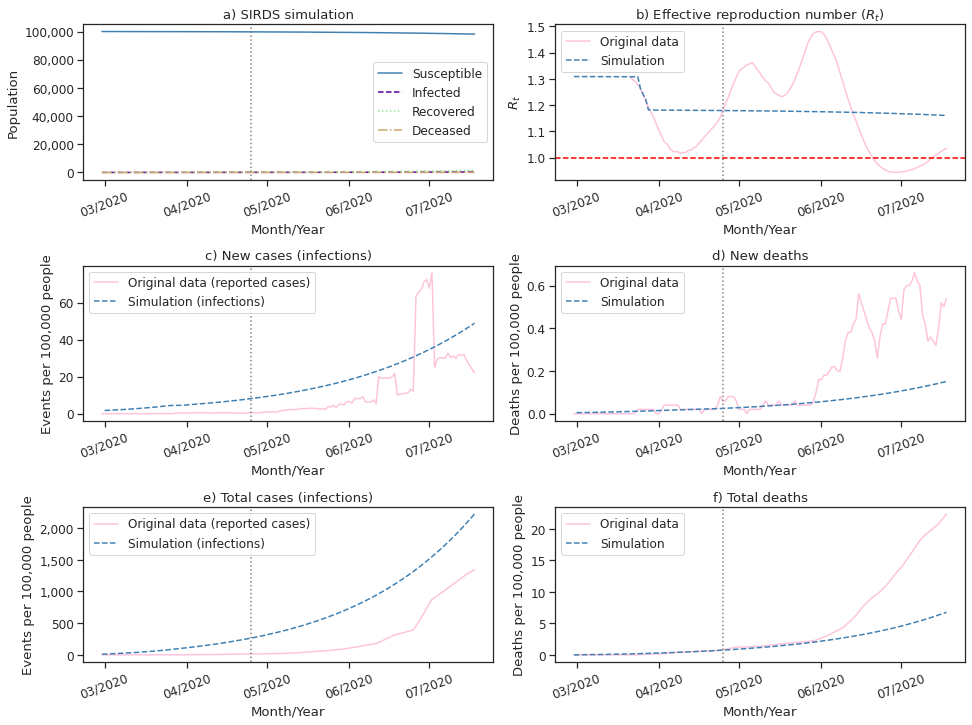

Uberlândia


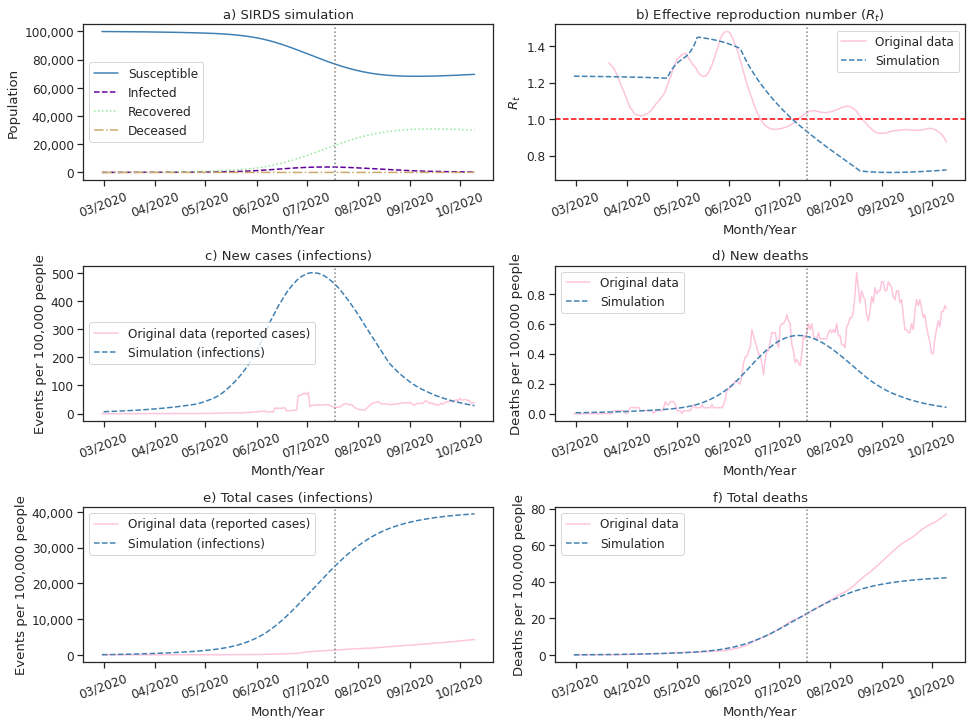

Uberlândia


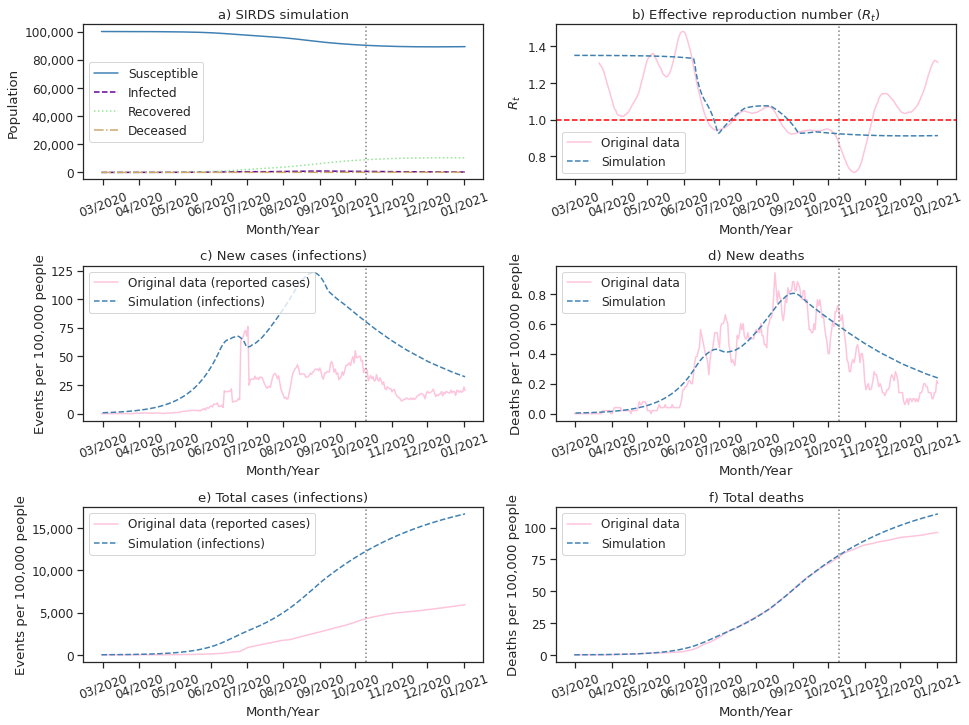

Uberlândia


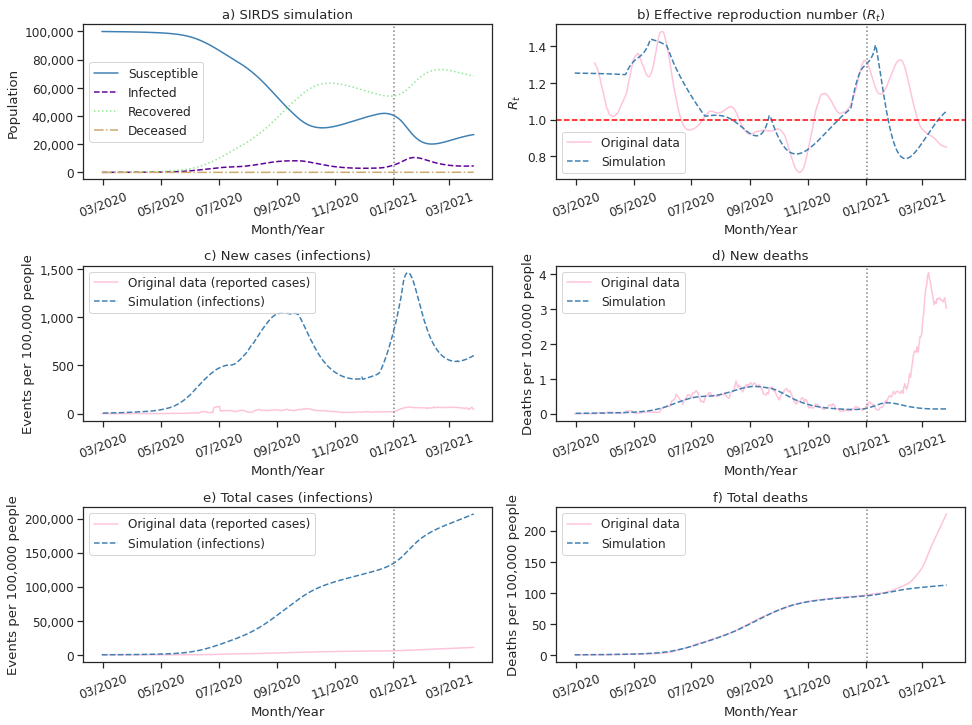

Uberlândia


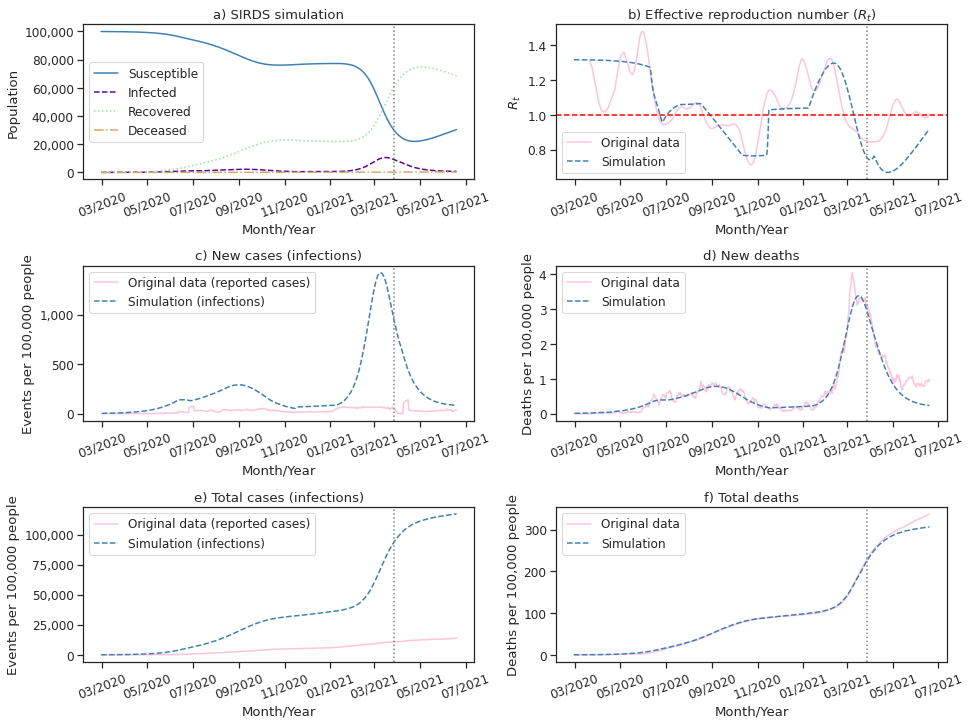

Uberlândia


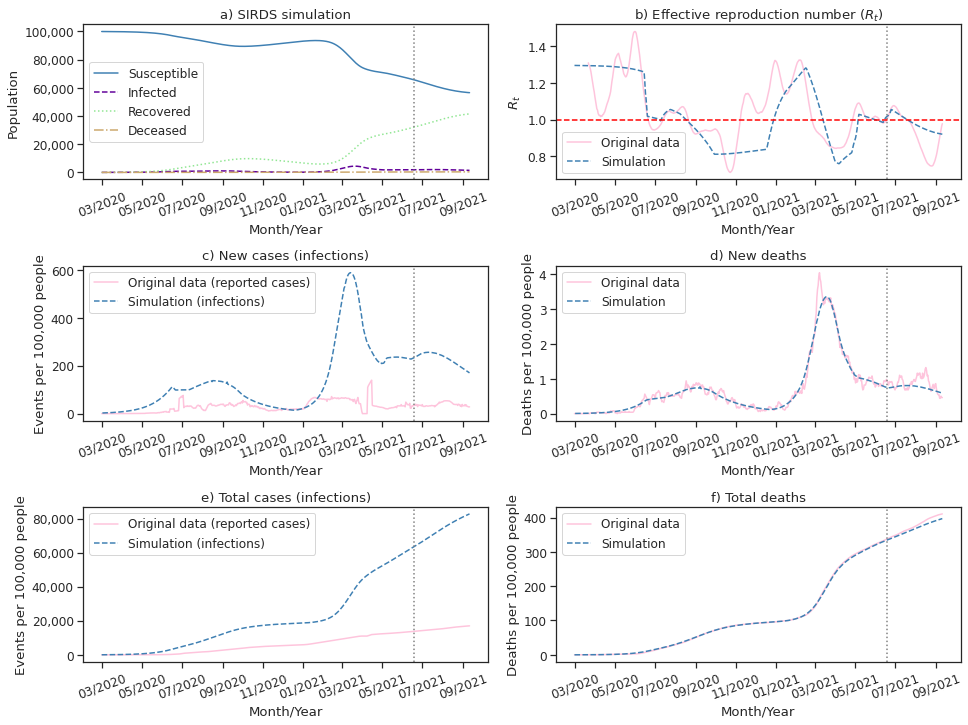

Uberlândia


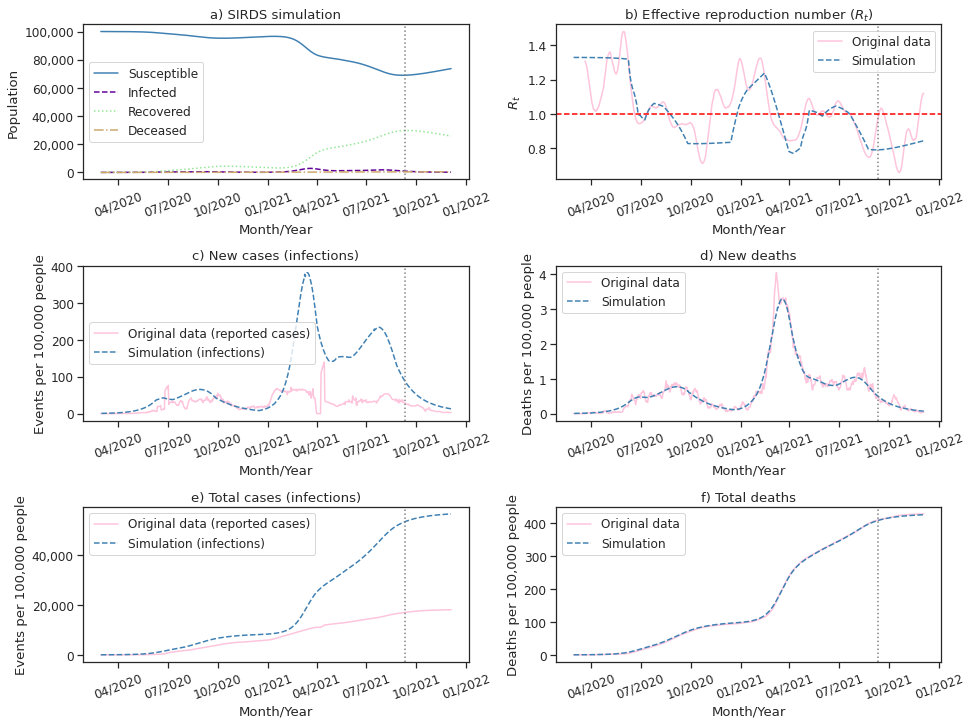

Uberlândia


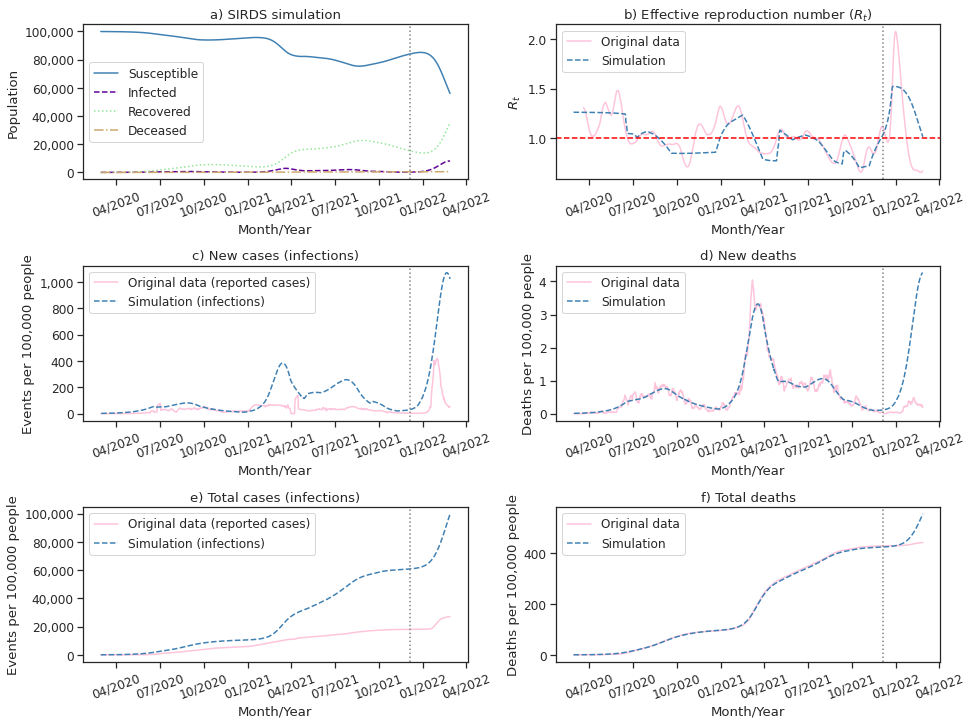

Uberlândia


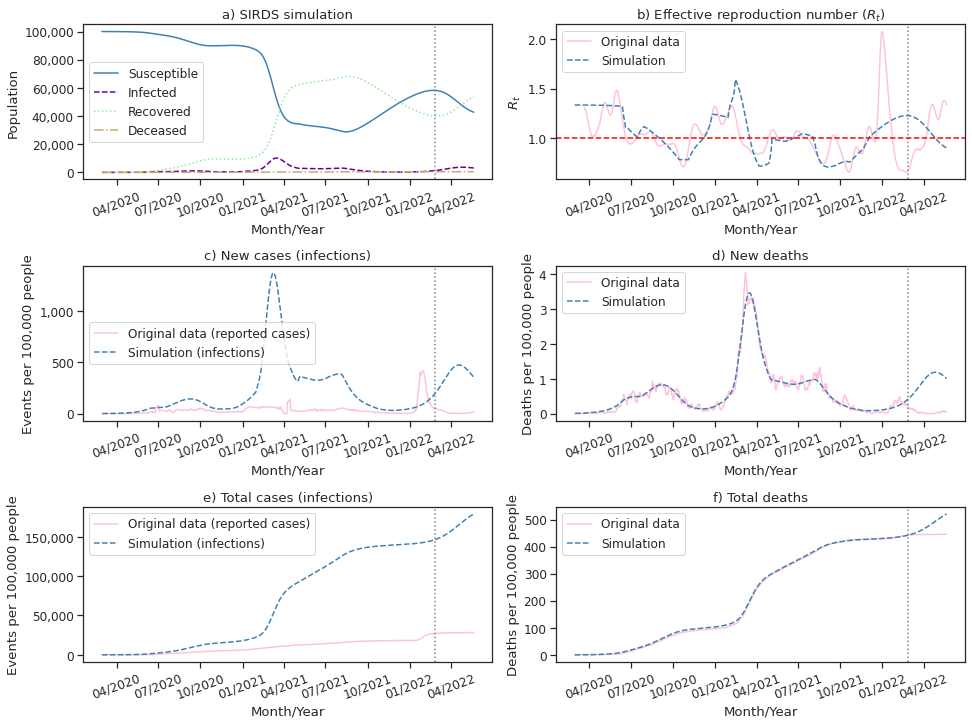

In [20]:
rt_column = 'NUMERO_REPRODUCAO_EFETIVO_SRAG_MEDIA'

for max_date_to_fit in df_results['max_date_to_fit'].unique():
    df_results_max_data_to_fit = df_results.loc[df_results['max_date_to_fit'] == max_date_to_fit]
    #for id_municipality in df_results_max_data_to_fit.municipality_id.unique():
    for id_municipality in df_results_max_data_to_fit[df_results_max_data_to_fit['municipality']=='Uberlândia'].municipality_id.unique():        
        df_results_municipality = df_results_max_data_to_fit.loc[df_results_max_data_to_fit.municipality_id == id_municipality]
        df_results_municipality = df_results_municipality[df_results_municipality['result_fun'] == df_results_municipality['result_fun'].min()]
        municipality = df_results_municipality.municipality.iloc[0]
        df_municipality = df[(df.CODIGO_MUNICIPIO_6 == id_municipality)].copy().reset_index(drop=True)    
        population = df_municipality.POPULACAO_2022.loc[0]
    
        for index, result in df_results_municipality.iterrows():
            result = result.dropna()                
    
            date_first_case = pd.to_datetime(result.date_first_case)
            days_to_recovery = result.days_to_recovery        
            period_in_days_to_fit = int(result.period_in_days)
            period_in_days_general = period_in_days_to_fit + FORECASTING_HORIZON
    
            df_temp = df_municipality[(df_municipality.DATA >= date_first_case)][:period_in_days_general]
            real_new_deaths = df_temp.TAXA_OBITOS_NOVOS_MEDIA_MOVEL_7_DIAS
            real_total_deaths = df_temp.TAXA_OBITOS_NOVOS_MEDIA_MOVEL_7_DIAS.cumsum()
            real_new_cases = df_temp.TAXA_CASOS_NOVOS_MEDIA_MOVEL_7_DIAS
            real_total_cases = df_temp.TAXA_CASOS_NOVOS_MEDIA_MOVEL_7_DIAS.cumsum()
            real_reproduction_number = df_temp[rt_column].round(6).values
    
            y = get_sirds(result, FORECASTING_HORIZON)
            S, I, R, D, I_accumulated = y
            N = S[0] + I[0] + R[0] + D[0]
    
            # print(result)
    
            D_new_deaths, reproduction_number_sird, I_new_cases, epidemic_periods_with_fast_transition_fuzzy_variable, epidemic_periods_with_slow_transition_fuzzy_variable, days_between_infections_values, case_fatality_probability_values, loss_immunity_in_days_values, estimated_days_between_infections, estimated_case_fatality_probability, estimated_loss_immunity_in_days = get_sirds_extras(result, S, D, I_accumulated, forecast_horizon=FORECASTING_HORIZON)
    
            # show_performance_single(real_new_deaths, D_new_deaths, real_reproduction_number,  reproduction_number_sird) 
            
            print(municipality)
    
            plot_result_single(y, D_new_deaths, real_new_deaths, real_total_deaths, real_reproduction_number, reproduction_number_sird, real_total_cases, real_new_cases, I_new_cases, df_temp.DATA.values, epidemic_periods_with_fast_transition_fuzzy_variable, epidemic_periods_with_slow_transition_fuzzy_variable, days_between_infections_values, days_to_recovery, case_fatality_probability_values, loss_immunity_in_days_values, False, max_date_to_fit=max_date_to_fit)

In [10]:
df_results_municipality

,municipality_id,max_date_to_fit,municipality,estimation,result_fun,result_nfev,result_nit,result_success,start_time,end_time,...,x_breakpoint_11,x_transition_days_between_epidemic_periods_11,x_days_between_infections_12,x_breakpoint_12,x_transition_days_between_epidemic_periods_12,x_case_fatality_probability_3,x_loss_immunity_in_days_3,x_days_between_infections_13,x_breakpoint_13,x_transition_days_between_epidemic_periods_13
6563,310620.0,2022-02-26,Belo Horizonte,13.0,0.212245,103585.0,604.0,True,2024-06-06 05:59:39,2024-06-06 06:25:01,...,NaN,NaN,NaN,NaN,NaN,0.000627,337.795937,NaN,NaN,NaN
